# Task 1: Data Preprocessing and Exploratory Data Analysis (EDA)

**Objective:** Load, clean, and understand the data to prepare it for modeling.

This notebook focuses on extracting financial data for TSLA, BND, and SPY, cleaning it, and performing exploratory analysis.

In [1]:


import sys
from pathlib import Path
import os

# Add the src directory to the path to import modules (ensure correct absolute path)

sys.path.append(os.path.abspath(os.path.join('..', 'src')))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_loader import fetch_data, clean_data, calculate_returns
from eda_utils import plot_closing_prices, plot_daily_returns, analyze_volatility, perform_adf_test, calculate_risk_metrics

%matplotlib inline

## 1. Extract Historical Financial Data

In [2]:
import os

tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2026-01-15'

print(f"Fetching data for {tickers} from {start_date} to {end_date}...")
raw_data = fetch_data(tickers, start_date, end_date)
print("Data fetched successfully.")

# Define the directory and file path
output_dir = '../data/raw'
file_path = os.path.join(output_dir, 'market_data.csv')

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")

# Now save the data
raw_data.to_csv(file_path)
print(f"Data saved to {file_path}")

print(raw_data.head())

Fetching data for ['TSLA', 'BND', 'SPY'] from 2015-01-01 to 2026-01-15...


[*********************100%***********************]  3 of 3 completed

Data fetched successfully.
Data saved to ../data/raw\market_data.csv
Ticker            BND         SPY       TSLA
Date                                        
2015-01-02  60.386002  170.589615  14.620667
2015-01-05  60.561275  167.508804  14.006000
2015-01-06  60.736668  165.931046  14.085333
2015-01-07  60.773224  167.998734  14.063333
2015-01-08  60.678211  170.979904  14.041333


## 2. Data Cleaning and Understanding

In [3]:
clean_df = clean_data(raw_data)
print("Cleaned Data Statistics:")
print(clean_df.describe())

Cleaned Data Statistics:
Ticker          BND          SPY         TSLA
count   2775.000000  2775.000000  2775.000000
mean      67.325728   339.074725   138.472937
std        4.685295   141.925744   131.682073
min       59.698631   154.980881     9.578000
25%       63.436413   219.599655    17.851666
50%       66.492104   301.538574    91.625999
75%       71.237366   423.938477   242.028336
max       76.068108   695.159973   489.880005


## 3. Exploratory Data Analysis (EDA)

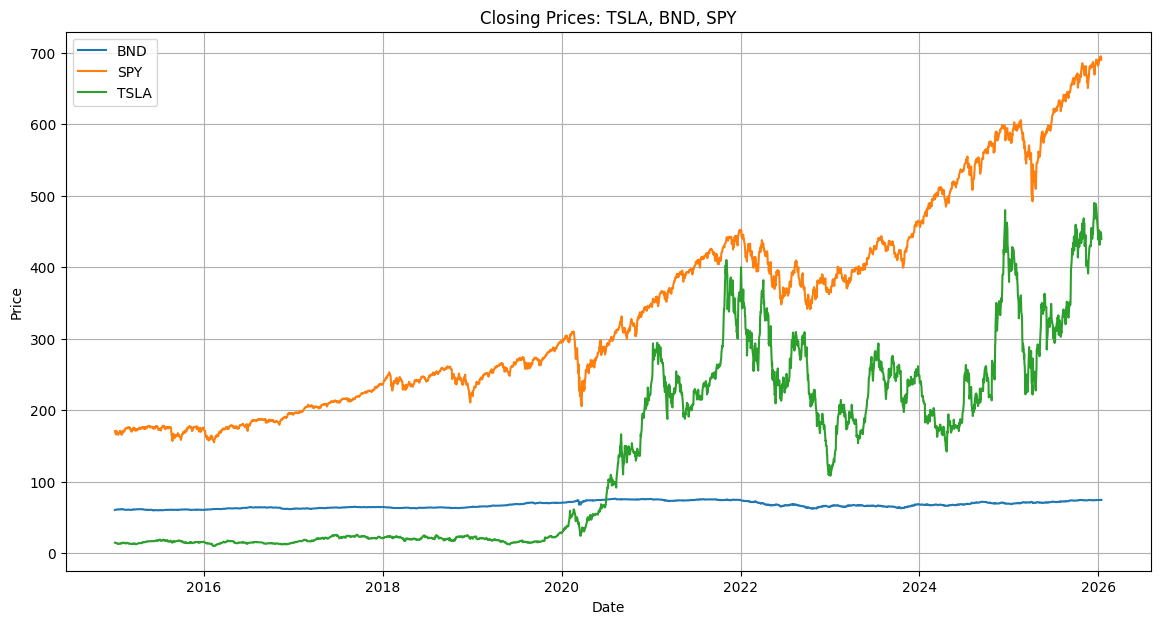

In [4]:
plot_closing_prices(clean_df, title="Closing Prices: TSLA, BND, SPY")

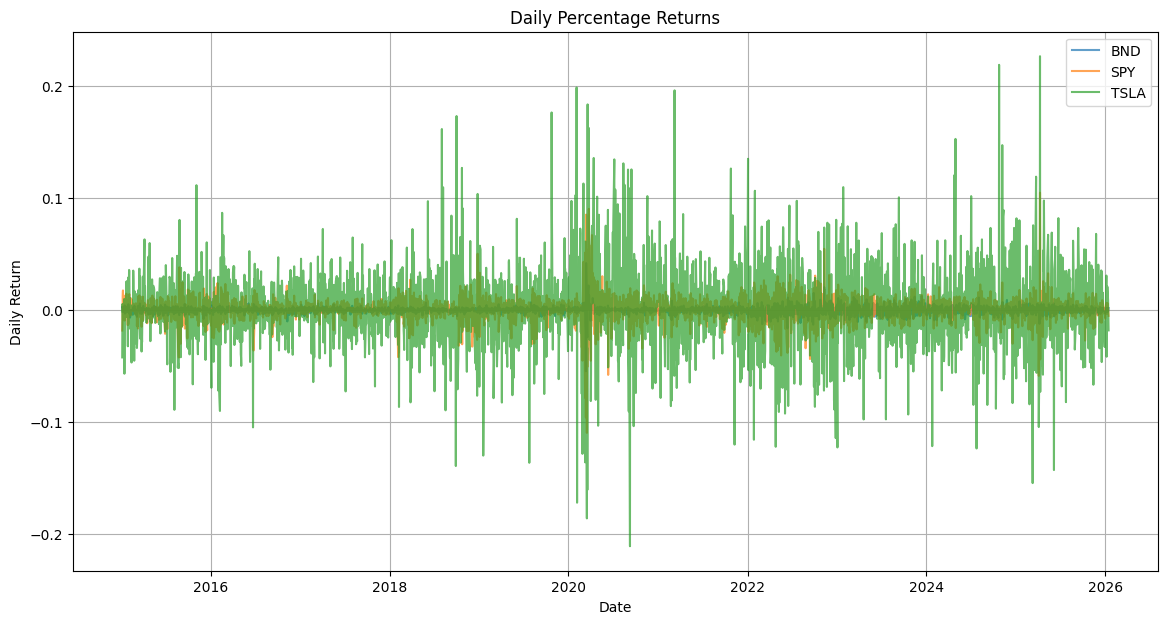

In [5]:
daily_returns = calculate_returns(clean_df)
plot_daily_returns(daily_returns, title="Daily Percentage Returns")

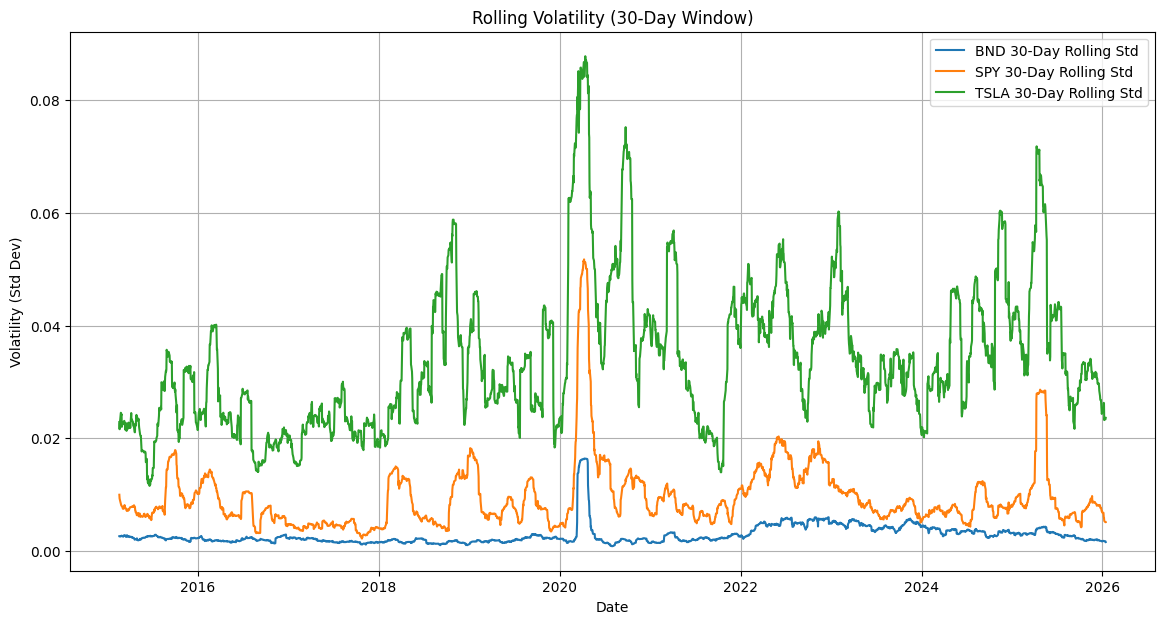

Ticker           BND       SPY      TSLA
Date                                    
2026-01-08  0.001749  0.005405  0.023238
2026-01-09  0.001744  0.005280  0.023507
2026-01-12  0.001739  0.005165  0.023375
2026-01-13  0.001722  0.005115  0.023366
2026-01-14  0.001594  0.005128  0.023634


In [6]:
volatility = analyze_volatility(daily_returns, window=30)
print(volatility.tail())

## 4. Seasonality and Trend Analysis (Stationarity Test)

In [7]:
print("Performing ADF Test for TSLA Closing Prices:")
perform_adf_test(clean_df['TSLA'])

print(" Performing ADF Test for TSLA Daily Returns:")
perform_adf_test(daily_returns['TSLA'])

Performing ADF Test for TSLA Closing Prices:
ADF Statistic: -0.7801569882105652
p-value: 0.8248814297221106
Critical Values:
	1%: -3.4327336210581345
	5%: -2.8625931125961683
	10%: -2.567330605587204
Result: The series is non-stationary.
 Performing ADF Test for TSLA Daily Returns:
ADF Statistic: -53.0196185442436
p-value: 0.0
Critical Values:
	1%: -3.4327103908048398
	5%: -2.862582853253982
	10%: -2.567325143520494
Result: The series is stationary.


(np.float64(-53.0196185442436),
 0.0,
 0,
 2773,
 {'1%': np.float64(-3.4327103908048398),
  '5%': np.float64(-2.862582853253982),
  '10%': np.float64(-2.567325143520494)},
 np.float64(-10388.118460404932))

## 5. Risk Metrics

In [8]:
risk_metrics = calculate_risk_metrics(daily_returns)
print("Risk Metrics (VaR 95% and Sharpe Ratio):")
print(risk_metrics)

Risk Metrics (VaR 95% and Sharpe Ratio):
          VaR_95  Sharpe_Ratio
Ticker                        
BND    -0.004796      0.381458
SPY    -0.016719      0.803992
TSLA   -0.052529      0.823185
